---

Load libraries

---

In [1]:
## Load libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
plt.style.use('dark_background')
%matplotlib inline

In [ ]:
# !pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-2.0.1-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached h5py-3.15.1-

---

Mount Google drive

---

In [4]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/MSIS Coursework/OddSem2025MAHE'
    DATA_DIR = DIR + '/Data/'
else:
    DATA_DIR = 'Data/'

---

Load diabetes data (binary & multilabel classification)

---

In [2]:
## Load diabetes data
file = 'diabetes.csv'
df= pd.read_csv(file, header = 0).dropna()

## Train and test split of the data
X = df.loc[:,df.columns!='Outcome']
y = df['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Standardize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Convert train and test data to torch tensors (note that Y should be a 1-column matrix)
X_train = torch.tensor(X_train, dtype = torch.float64)
X_test = torch.tensor(X_test,dtype=torch.float64)
# Label encode class labels (do the following if using logistic regression for multilabel classification)
Y_train = torch.tensor(Y_train.values,dtype=torch.int32).reshape(-1, 1)
Y_test = torch.tensor(Y_test.values,dtype=torch.int32).reshape(-1,1)
# One-hot encode class labels (do the following if using softmax for multilabel classification)
#Y_train =  nn.functional.one_hot(torch.tensor(Y_train.values, dtype = torch.int64))
#Y_test = nn.functional.one_hot(torch.tensor(Y_test.values, dtype = torch.int64))


num_samples = X_train.shape[0]
num_features = X_train.shape[1]
num_labels = len(np.unique(Y_train))

print('Diabetes data set')
print('---------------------')
print('Number of training samples = %d'%(num_samples))
print('Number of features = %d'%(num_features))

Diabetes data set
---------------------
Number of training samples = 614
Number of features = 8


---

Load MNIST Data (multilabel classification)

---

In [3]:
## Load MNIST data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = torch.tensor(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = torch.tensor(X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

num_samples = X_train.shape[0]
num_labels = len(np.unique(y_train))
num_features = X_train.shape[1]

# One-hot encode class labels
Y_train =  nn.functional.one_hot(torch.tensor(y_train, dtype = torch.int64))
Y_test = nn.functional.one_hot(torch.tensor(y_test, dtype = torch.int64))

# Normalize the samples (images) using the training data
xmax = torch.amax(X_train) # 255
xmin = torch.amin(X_train) # 0
X_train = (X_train-xmin)/(xmax-xmin) # all train features turn into a number between 0 and 1
X_test = (X_test-xmin)/(xmax-xmin)

print('MNIST set')
print('---------------------')
print('Number of training samples = %d'%(num_samples))
print('Number of features = %d'%(num_features))
print('Number of output labels = %d'%(num_labels))

MNIST set
---------------------
Number of training samples = 60000
Number of features = 784
Number of output labels = 10


---

Load housing data (regression)

---

In [7]:
## Load housing data
file = 'houseprices_cleaned.csv'
df= pd.read_csv(file, header = 0).dropna()

## Train and test split of the data
X = df[['area', 'rent']]
y = df['price_per_sqft']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Standardize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Convert train and test data to numpy arrays (note that Y should be a 1-column matrix)
X_train = torch.tensor(X_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)
Y_train = torch.tensor(Y_train.values, dtype = torch.float32).reshape(-1, 1)
Y_test = torch.tensor(Y_test.values, dtype = torch.float32).reshape(-1, 1)

num_samples = X_train.shape[0]
num_features = X_train.shape[1]

print('Housing data set')
print('---------------------')
print('Number of training samples = %d'%(num_samples))
print('Number of features = %d'%(num_features))

Housing data set
---------------------
Number of training samples = 159
Number of features = 2


---

A generic layer class with forward and backward methods

----

In [8]:
class Layer(nn.Module):
  def __init__(self):
    super(Layer, self).__init__()
    self.input = None
    self.output = None

  def forward(self, input):
    raise NotImplementedError("Forward propagation not implemented")

  def backward(self, output_gradient,leraning_rate ):
    raise NotImplementedError("Backward propagation not implemented")

---

Binary crossentropy (BCE) loss and its gradient for the batch samples (for binary classification)

---

In [9]:
## Define the loss function and its gradient
class BinaryCrossEntropyLoss:
  def forward(self, Y, Yhat):
    epsilon = torch.tensor(1.0e-08)
    return torch.mean(-Y*torch.log(Yhat+epsilon)-(1-Y)*torch.log(1-Yhat+epsilon))

  def backward(self, Y, Yhat):
    epsilon = 1e-8
    return (Yhat-Y)/(Yhat*(1-Yhat))

---

Categorical crossentropy (CCE) loss and its gradient for the batch samples (for multilabel classification)

---

In [ ]:
## Define the loss function and its gradient
class CategoricalCrossEntropyLoss:
  def forward(self, Y, Yhat):
    return ?

  def backward(self, Y, Yhat):
    return ?

---

Mean squared error (MSE) loss and its gradient for the batch samples (for regression)

---

In [ ]:
## Define the loss function and its gradien
class MeanSquaredErrorLoss:
  def forward(self, Y, Yhat):
    return ?

  def backward(self, Y, Yhat):
    return ?

---

Sigmoid activation layer class

---

In [10]:
class Sigmoid(Layer):
  def forward(self, input):
    self.input = input
    self.output = 1.0/(1.0+torch.exp(-self.input))
    return self.output

  def backward(self, output_gradient, learning_rate = None):
    sigmoid_local_gradient = self.output*(1.0-self.output)
    if output_gradient.shape[1] > 1:
      return sigmoid_local_gradient* output_gradient[:, :-1] 
    else:
      return sigmoid_local_gradient*output_gradient 

---
dense Layer
---

In [5]:
X_train_batch=torch.tensor([[76,124,38,100,16.0],
                     [86,128,38,120,26.0],
                     [79,134,39,130,10.0],
                     [76,144,37,95,17.0]],dtype=torch.float64)

Y_train_batch=torch.tensor([1.0,0.0,0.0,1.0],dtype=torch.float64).reshape(-1,1)
output_gradient=torch.tensor([1.0,2.0,3.0,4.0],dtype=torch.float64)
torch.mean(torch.einsum('ij,i->i',X_train_batch,output_gradient))

tensor(950.5000, dtype=torch.float64)

In [11]:
class Dense(Layer):
    def __init__(self,input_size,output_size):
        super(Dense,self).__init__()
        self.weights=nn.Parameter(torch.randn(input_size+1,output_size,dtype=torch.float64)*0.01)
        with torch.no_grad():
            self.weights[-1].fill_(0.01)
    def forward(self,input):
        self.input=torch.hstack([input,torch.ones(input.shape[0],1)])
        self.output=torch.matmul(self.input,self.weights)
        return self.output
    def backward(self,output_gradient,learning_rate):
        dense_local_gradient=self.input
        return torch.mean(torch.einsum('ij,i->i',dense_local_gradient,output_gradient))


In [ ]:
# class Dense(Layer):
#     def __init__(self, input_size, output_size):
#         super(Dense, self).__init__()
#         self.weights = nn.Parameter(torch.randn(input_size+1, output_size, dtype = torch.float64)*0.01)
#         with torch.no_grad():
#             # Set bias to the same constant value
#             self.weights[-1].fill_(0.01)
 
#     def forward(self, input):
#         # Bias trick
#         self.input = torch.hstack([input, torch.ones(input.shape[0], 1)])
#         self.output = torch.matmul(self.input, self.weights)
#         return self.output

In [ ]:

X_train_batch=torch.tensor([[76,124,38,100,16.0],
                     [86,128,38,120,26.0],
                     [79,134,39,130,10.0],
                     [76,144,37,95,17.0]],dtype=torch.float64)
num_features=X_train_batch.shape[1]
Y_train_batch=torch.tensor([1.0,0.0,0.0,1.0],dtype=torch.float64).reshape(-1,1)
my_denselayer=Dense(num_features,1)
mysigmoid=Sigmoid()
x=X_train_batch
loss_fn=BinaryCrossEntropyLoss()
x=my_denselayer.forward(x)
x=mysigmoid.forward(x)
print(x)
loss_train_batch=loss_fn.forward(Y_train_batch,x)
print(loss_train_batch)
grad=loss_fn.backward(Y_train_batch,x)
grad=mysigmoid.backward(grad)
grad=my_denselayer.backward(grad,learning_rate=1e-02)

print(grad)

tensor([[0.5948],
        [0.6540],
        [0.6392],
        [0.5509]], dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7991, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor([[0.3839],
        [0.6365],
        [0.5717],
        [0.2041]], dtype=torch.float64, grad_fn=<MmBackward0>)


---

Softmax activation layer class


---

In [ ]:
## Softmax activation layer class
class Softmax(Layer):
  def forward(self, input):
    self.input = input
    exp_values = torch.exp(self.input - torch.max(self.input, dim = 1, keepdim = True).values)
    self.output = ?
    return self.output

  def backward(self, output_gradient, learning_rate = None):
    I = torch.eye(self.output.shape[1])
    softmax_local_gradient = ?
    # Calculate gradient flowing back on the input side of the softmax layer
    input_gradient = torch.einsum(?, ?, ?)
    return input_gradient

---

Neural network class for:

 1. Binary classification (loss function is binary crossentropy and last layer has one node that is sigmoid-activated).
 2. Multilabel classification (loss function is categorical crossentropy and last layer is softmax-activated).
 3. Regression (loss function is MSE loss and last layer is dense with one node).

---

In [ ]:
class NeuralNetwork:
  def __init__(self, num_features, num_labels, loss_fn,
               learning_rate, reg_strength = 0.0):
    self.num_features = num_features
    self.num_labels = num_labels
    self.loss_fn = loss_fn
    self.learning_rate = learning_rate
    self.reg_strength = reg_strength
    self.reg_loss = None
    # Architecture
    self.layers = []

  # Forward propagation
  def forward(self, x):
    self.reg_loss = 0.0
    for layer in self.layers:
      ?
    return x

  # Backward propagation
  def backward(self, loss_gradient):
    for layer in ?:
      loss_gradient = ?

---

Train a neural network for:

 1. Binary classification (loss function is binary crossentropy).
 2. Multilabel classification (loss function is categorical crossentropy).
 3. Regression (loss function is MSE).

---

In [ ]:
# Initialize model and optimizer
learning_rate = ?
epochs = ?
reg_strength = ?
batch_size = ?

# Choose appropriate loss function
loss_fn = ?

# Data loader for batch processing
train_loader = ?
test_loader = ?

model = ?

# Create empty list to store training and test losses over each epoch
train_loss = [None]*epochs
test_loss = [None]*epochs

for epoch in range(epochs):
  loss = 0.0

  for x_batch, y_batch in train_loader:
    # Forward pass
    predictions = ?
    loss += 

    # Backward pass
    loss_gradient = ?
    model.backward(?)

  train_loss[epoch] = loss.detach().numpy() / len(train_loader)

  # Test loss calculation
  loss = 0.0

  with torch.no_grad():
    for x_batch, y_batch in ?:
      predictions = ?
      loss += 

  test_loss[epoch] = ?
  
  print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss[epoch]:.4f}, Test Loss: {test_loss[epoch]:.4f}")

---

Plot training and test loss vs. epoch

---

NameError: name 'train_loss' is not defined

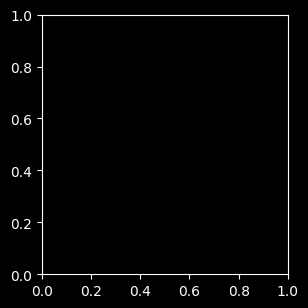

In [12]:
## Plot train and test loss as a function of epoch:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
fig.tight_layout(pad = 4.0)
ax.plot(train_loss, 'b', label = 'Train')
ax.plot(test_loss, 'r', label = 'Test')
ax.set_xlabel('Epoch', fontsize = 12)
ax.set_ylabel('Loss value', fontsize = 12)
ax.legend()
ax.set_title('Loss vs. Epoch', fontsize = 14);

---

Assess model performance on test data

---

In [ ]:
## Assess model performance on test data (multilabel classification)
with torch.no_grad():
  for x_batch, y_batch in test_loader:
    predictions = ?

# Predicted labels for binary classification
ypred = ?

# Predicted labels for multilabel classification
#ypred = ?

# Predicted values for regression
#ypred = ?

# True labels for binary classification
ytrue = ?

# True labels for multilabel classification
#ytrue = ?

# True labels for regression
#ytrue = ?

# Classifier performace
?
# Print confusion matrix
?

# Regressor performance
#?